In [1]:
import numpy as np
import matplotlib.pyplot as plt
import gudhi
import gudhi as gd
import torch
from utilsTopology import *
from utilsBaricentricNeuralNetwork import *
from utils import *
fontsize=16

2025-03-10 15:36:42.947927: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1741617404.313131     910 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1741617404.704547     910 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-03-10 15:36:48.212027: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


# Computations on simplicial complex. Two examples: One consisting of 3 points and another one consisting of 250 points simulating the sine function

Diagrama de persistencia: tensor([[1., 2.],
        [0., 2.]])
Persistent entropy aprox (dimension 0):  tensor(0.6365)


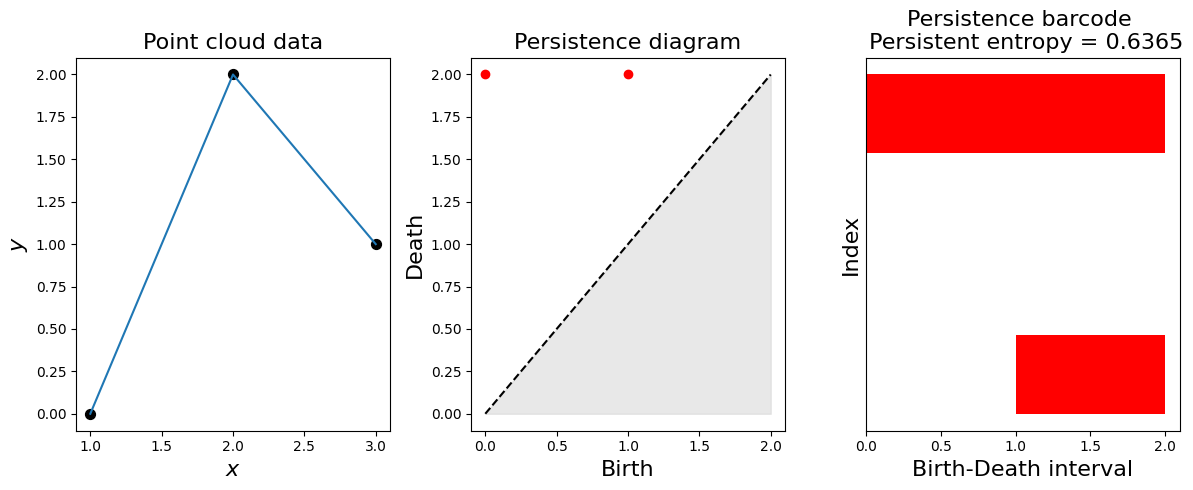

In [3]:
persistence_layer = LowerStarPersistenceBasic(maxdim=0)

# Valores de filtración (tensor 1D)
x = torch.tensor([[1.0,0.0], [2.0,2.0], [3.0,1.0]])
max_value = x[:,1].max()
# Calcular el diagrama de persistencia
dgms = persistence_layer(x[:,1])
dgms[dgms==float('inf')] = max_value
print("Diagrama de persistencia:", dgms)

dgmsNumpy = dgms.detach().numpy()
entropy=persistent_entropyTorch(dgms)
print("Persistent entropy aprox (dimension 0): " ,entropy)

# --- Gráfico de diagrama de persistencia ---
plt.figure(figsize=(12, 5))

# Subplot 1: Point cloud
plt.subplot(1, 3, 1)
plt.scatter(x.detach().numpy()[:, 0], x.detach().numpy()[:, 1], c='black', s=50, zorder=2)
plt.plot(x.detach().numpy()[:, 0],x.detach().numpy()[:, 1])
plt.title('Point cloud data', fontsize=fontsize)
plt.xlabel("$x$", fontsize=fontsize)
plt.ylabel("$y$", fontsize=fontsize)

# Subplot 2: Diagrama de persistencia
plt.subplot(1, 3, 2)
plt.title("Persistence diagram", fontsize=fontsize)
plt.scatter(dgmsNumpy[:, 0], dgmsNumpy[:, 1], color="red", label="0")
plt.plot([0, max(dgmsNumpy[:, 1])], [0, max(dgmsNumpy[:, 1])], color="black", linestyle="--")
plt.fill_between([0, max(dgmsNumpy[:, 1])], [0, max(dgmsNumpy[:, 1])], color='lightgray', alpha=0.5)
plt.xlabel("Birth", fontsize=fontsize)
plt.ylabel("Death", fontsize=fontsize)

# Subplot 3: Código de barras de persistencia
plt.subplot(1, 3, 3)
plt.title(f"Persistence barcode \n Persistent entropy = {round(entropy.item(),4)}", fontsize=fontsize)

bar_width = 0.3  # Ancho de las barras
for i, (birth, death) in enumerate(dgmsNumpy):
    plt.barh(i, death - birth, left=birth, color="red", height=bar_width, label="0" if i == 0 else "")

plt.xlabel("Birth-Death interval",fontsize=fontsize)
plt.ylabel("Index",fontsize=fontsize)
plt.yticks([])  # Ocultar etiquetas del eje Y

plt.tight_layout()
plt.savefig('figures/DiagramBarcodeExample1.png', dpi=300, bbox_inches='tight')
plt.show()

Persistence diagram: tensor([[-0.5440,  0.9997],
        [-0.9997,  0.9999],
        [-0.9999,  1.0000],
        [-1.0000,  1.0000]])
Persistent entropy aprox:  tensor(1.3806)


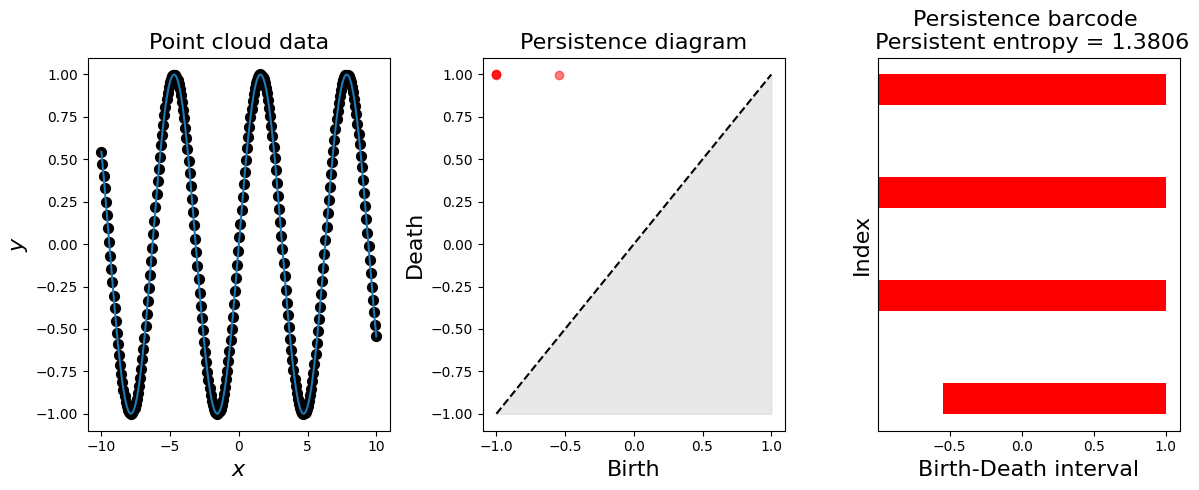

In [4]:
domain =[-10,10]
function=np.sin
x_train, y_train = generate_training_data(function, (domain[0], domain[1]), 250)
x_train_tensor = torch.tensor(x_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32)

persistence_layer = LowerStarPersistenceBasic(maxdim=0)

max_valueRef = y_train_tensor.max()
dgmsRef = persistence_layer(y_train_tensor)
dgmsRef[dgmsRef==float('inf')] = max_valueRef
print("Persistence diagram:", dgmsRef)

dgmsNumpy = dgmsRef.detach().numpy()
entropy=persistent_entropyTorch(dgmsRef)
print("Persistent entropy aprox: " ,entropy)

plt.figure(figsize=(12, 5))

# Subplot 1: Point cloud
plt.subplot(1, 3, 1)
plt.scatter(x_train_tensor, y_train_tensor, c='black', s=50, zorder=2)
plt.plot(x_train_tensor,y_train_tensor)
plt.title('Point cloud data', fontsize=fontsize)
plt.xlabel("$x$", fontsize=fontsize)
plt.ylabel("$y$", fontsize=fontsize)

# Subplot 2: Persistence diagram
plt.subplot(1, 3, 2)
plt.title("Persistence diagram", fontsize=fontsize)
plt.scatter(dgmsNumpy[:, 0], dgmsNumpy[:, 1], color="red", label="0", alpha=0.5)
min_val = min(np.min(dgmsNumpy[:, 0]), np.min(dgmsNumpy[:, 1]))
max_val = max(np.max(dgmsNumpy[:, 0]), np.max(dgmsNumpy[:, 1]))
plt.plot([min_val, max_val], [min_val, max_val], 'k--')
x_vals = np.linspace(min_val, max_val, 100)  # Puntos para la diagonal
plt.fill_between(x_vals, min_val, x_vals, color='lightgray', alpha=0.5)
plt.xlabel("Birth", fontsize=fontsize)
plt.ylabel("Death", fontsize=fontsize)

# Subplot 3: Persistence barcode and persistent entropy
plt.subplot(1, 3, 3)
plt.title(f"Persistence barcode \n Persistent entropy = {round(entropy.item(),4)}", fontsize=fontsize)

bar_width = 0.3  
for i, (birth, death) in enumerate(dgmsNumpy):
    plt.barh(i, death - birth, left=birth, color="red", height=bar_width, label="0" if i == 0 else "")

plt.xlabel("Birth-Death interval",fontsize=fontsize)
plt.ylabel("Index",fontsize=fontsize)
plt.yticks([])  

plt.tight_layout()
plt.savefig('figures/DiagramBarcodeExample2.png', dpi=300, bbox_inches='tight')
plt.show()



# Persistence barcode with and without noise

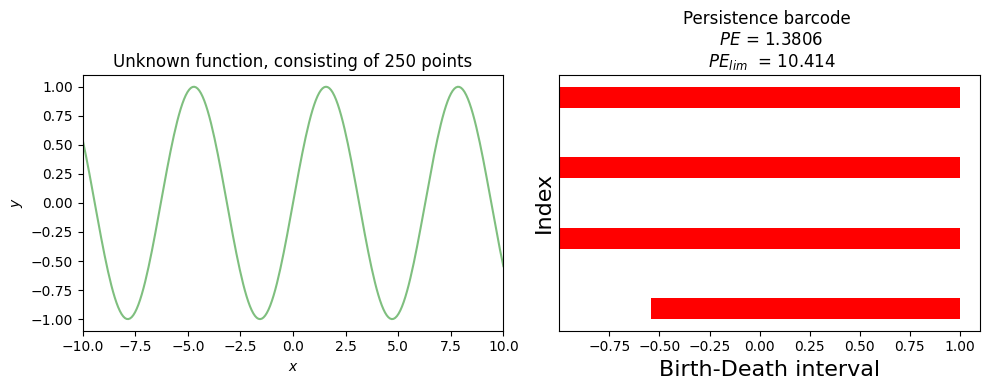

In [20]:
domain =[-10,10]
num_points=250
function=np.sin
x_train, y_train = generate_training_data(function, (domain[0], domain[1]), num_points)
x_train = tf.constant(x_train,dtype=tf.float32)
y_train = tf.constant(y_train,dtype=tf.float32)
stbase = gd.SimplexTree()
for i in range(250-1):
    stbase.insert([i,i+1], -1e10) # here we define that each element is connected to the next one, since what we have is a line formed by the points of the point cloud
layer = LowerStarLayer(simplextree=stbase)
dgms = layer.call(tf.Variable(y_train))
dgmRef = dgms[0][0]

entropyRef=persistent_entropy_tf(dgmRef)
entropyRefLim=persistent_entropy_lim_tf(dgmRef)

num_points_optimize=6
x_points = tf.Variable(tf.cast(tf.linspace(domain[0],domain[1],num_points_optimize+2), dtype=tf.float32) ,trainable=True)
y_points = interpolation_tf(x_train,y_train, x_points)
points = tf.stack([x_points, y_points], axis=1)

model = BaricentricNetworkTf(points)

y_aprox = model(x_train)

dgmsAprox = layer.call(y_aprox)
dgmAprox = dgmsAprox[0][0]
entropyAprox=persistent_entropy_tf(dgmAprox)
entropyAproxLim=persistent_entropy_lim_tf(dgmAprox)

loss = PersistentEntropyLossTF()
lossLim = PersistentEntropyLossLimTF()
error = loss(dgmRef,dgmAprox)
errorLim = lossLim(dgmRef,dgmAprox)

lim="lim"
fig, axs = plt.subplots(1, 2, figsize=(10, 4))
axs[0].plot(x_train, y_train, "g-", alpha=0.5)
axs[0].set_xlabel('$x$')
axs[0].set_ylabel('$y$')
axs[0].set_xlim((domain[0],domain[1]))
axs[0].set_title(f'Unknown function, consisting of 250 points')
axs[1].set_title(f"Persistence barcode")

bar_width = 0.3  
for i, (birth, death) in enumerate(dgmRef):
    axs[1].barh(i, death - birth, left=birth, color="red", height=bar_width, label="0" if i == 0 else "")

axs[1].set_xlabel("Birth-Death interval",fontsize=fontsize)
axs[1].set_ylabel("Index",fontsize=fontsize)
axs[1].set_yticks([])  
axs[1].set_title(axs[1].get_title() + f" \n $PE$ = {round(entropyRef.numpy().item(),4)}")
axs[1].set_title(axs[1].get_title() + " \n $PE_{lim}$ " + f" = {round(entropyRefLim.numpy().item(),4)}")
fig.tight_layout()
plt.savefig('figures/WithoutNoiseUnknownFunctionPEVariantsBarcode.png', dpi=300, bbox_inches='tight')
plt.show()

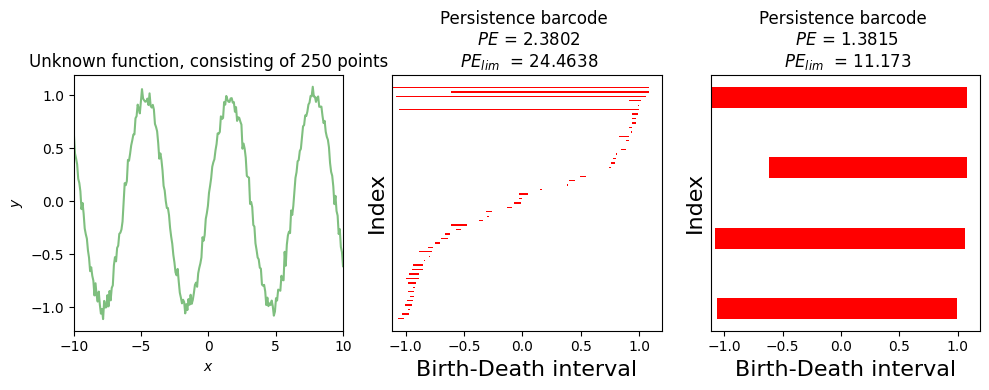

In [21]:
domain =[-10,10]
num_points=250
function=np.sin
x_train, y_train = generate_training_data(function, (domain[0], domain[1]), num_points)
np.random.seed(7)
ruido = np.random.normal(0, 0.05, size=x_train.shape)
y_train = y_train + ruido
x_train = tf.constant(x_train,dtype=tf.float32)
y_train = tf.constant(y_train,dtype=tf.float32)
stbase = gd.SimplexTree()
for i in range(250-1):
    stbase.insert([i,i+1], -1e10) # aqui definimos que cada elemento esta conectado com su siguiente, ya que lo que tenemos es una linea, una serie temporal
layer = LowerStarLayer(simplextree=stbase)
dgms = layer.call(tf.Variable(y_train))
dgmRef = dgms[0][0]
entropyRef=persistent_entropy_tf(dgmRef)
entropyRefLim=persistent_entropy_lim_tf(dgmRef)

mask = dgmRef[:,1] >= dgmRef[:,0] + 0.5
dgmRefFilt = dgmRef[mask]
entropyRefFilt=persistent_entropy_tf(dgmRefFilt)
entropyRefFiltLim=persistent_entropy_lim_tf(dgmRefFilt)

num_points_optimize=6
x_points = tf.Variable(tf.cast(tf.linspace(domain[0],domain[1],num_points_optimize+2), dtype=tf.float32) ,trainable=True)
y_points = interpolation_tf(x_train,y_train, x_points)
points = tf.stack([x_points, y_points], axis=1)

model = BaricentricNetworkTf(points)

y_aprox = model(x_train)

dgmsAprox = layer.call(y_aprox)
dgmAprox = dgmsAprox[0][0]
entropyAprox=persistent_entropy_tf(dgmAprox)
entropyAproxLim=persistent_entropy_lim_tf(dgmAprox)

loss = PersistentEntropyLossTF()
lossLim = PersistentEntropyLossLimTF()
error = loss(dgmRef,dgmAprox)
errorLim = lossLim(dgmRef,dgmAprox)

lim="lim"
fig, axs = plt.subplots(1, 3, figsize=(10, 4))
axs[0].plot(x_train, y_train,"g-", alpha=0.5)
axs[0].set_xlabel('$x$')
axs[0].set_ylabel('$y$')
axs[0].set_xlim((domain[0],domain[1]))
axs[0].set_title(f'Unknown function, consisting of 250 points')
axs[1].set_title(f"Persistence barcode")

bar_width = 0.3  
for i, (birth, death) in enumerate(dgmRef):
    axs[1].barh(i, death - birth, left=birth, color="red", height=bar_width, label="0" if i == 0 else "")

axs[1].set_xlabel("Birth-Death interval",fontsize=fontsize)
axs[1].set_ylabel("Index",fontsize=fontsize)
axs[1].set_yticks([])  
axs[1].set_title(axs[1].get_title() + f" \n $PE$ = {round(entropyRef.numpy().item(),4)}")
axs[1].set_title(axs[1].get_title() + " \n $PE_{lim}$ " + f" = {round(entropyRefLim.numpy().item(),4)}")
axs[2].set_title(f"Persistence barcode")

bar_width = 0.3  
for i, (birth, death) in enumerate(dgmRefFilt):
    axs[2].barh(i, death - birth, left=birth, color="red", height=bar_width, label="0" if i == 0 else "")

axs[2].set_xlabel("Birth-Death interval",fontsize=fontsize)
axs[2].set_ylabel("Index",fontsize=fontsize)
axs[2].set_yticks([])  
axs[2].set_title(axs[2].get_title() + f" \n $PE$ = {round(entropyRefFilt.numpy().item(),4)}")
axs[2].set_title(axs[2].get_title() + " \n $PE_{lim}$ " + f" = {round(entropyRefFiltLim.numpy().item(),4)}")
fig.tight_layout()
plt.savefig('figures/WithNoiseUnknownFunctionPEVariantsBarcode.png', dpi=300, bbox_inches='tight')
plt.show()

# Topological data analysis typical pipeline

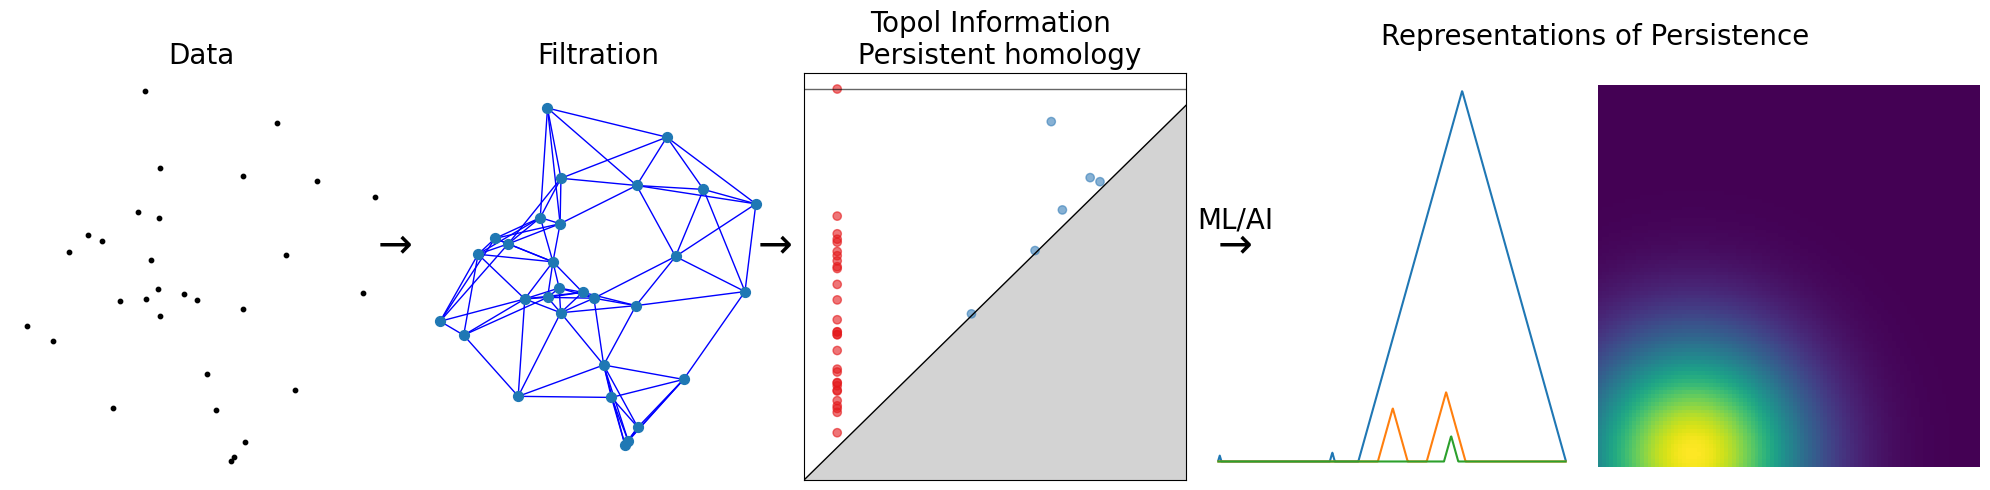

In [64]:
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
from sklearn.datasets import make_blobs
import gudhi
import gudhi as gd
import gudhi.representations
# 1. Generate Data
np.random.seed(42)
data, _ = make_blobs(n_samples=30, centers=1, cluster_std=1.5, random_state=42)

# 2. Create Multiscale Topological Structure (Graph)
def create_knn_graph(data, k=5):
    G = nx.Graph()
    for i, point in enumerate(data):
        distances = np.linalg.norm(data - point, axis=1)
        neighbors = np.argsort(distances)[1:k+1]  # Exclude itself (index 0)
        for neighbor in neighbors:
            G.add_edge(i, neighbor, weight=distances[neighbor])
    return G

graph = create_knn_graph(data)

# 4. Representation of Persistence
persistence_representation = np.random.normal(size=100)
persistence_histogram, persistence_bins = np.histogram(persistence_representation, bins=10)

# Plot Pipeline
fig, axes = plt.subplots(1, 5, figsize=(20, 5))

# Step 1: Data
axes[0].scatter(data[:, 0], data[:, 1], color='black', s=10)
axes[0].set_title("Data",fontsize=20)
axes[0].set_xticks([])
axes[0].set_yticks([])
axes[0].set_axis_off()

# Step 2: Multiscale Topological Structure
pos = {i: point for i, point in enumerate(data)}
nx.draw(graph, pos, ax=axes[1], node_size=50, edge_color='blue')
axes[1].set_title("Filtration",fontsize=20)

# Step 3: Persistent Homology
acX = gudhi.RipsComplex(points=data, max_edge_length=12.0).create_simplex_tree(max_dimension=2)
dgmX = acX.persistence()
gd.plot_persistence_diagram(dgmX, axes=axes[2], legend=False)
axes[2].set_title("Topol Information \n Persistent homology", fontsize=20)
axes[2].set_xticks([])
axes[2].set_yticks([])
axes[2].set_xlabel("")
axes[2].set_ylabel("")


# Step 4: Representations of Persistence
LS = gd.representations.Landscape(resolution=1000)
L = LS.fit_transform([acX.persistence_intervals_in_dimension(1)])
axes[3].plot(L[0][:1000])
axes[3].plot(L[0][1000:2000])
axes[3].plot(L[0][2000:3000])
axes[3].set_xticks([])
axes[3].set_yticks([])
axes[3].set_axis_off()

PI = gd.representations.PersistenceImage(resolution=[100,100],im_range=[0,5,0,5])
pi = PI.fit_transform([acX.persistence_intervals_in_dimension(1)])

axes[4].imshow(np.flip(np.reshape(pi[0], [100,100]), 0))
axes[4].set_xticks([])
axes[4].set_yticks([])
axes[4].set_axis_off()
# Shared title for the last two plots
fig.text(0.8, 0.90, "Representations of Persistence", fontsize=20, ha='center')

# Add arrows
fig.text(0.2, 0.5, '→', fontsize=30, va='center', ha='center')
fig.text(0.39, 0.5, '→', fontsize=30, va='center', ha='center')
fig.text(0.62, 0.5, '→', fontsize=30, va='center', ha='center')
fig.text(0.62, 0.55, 'ML/AI', fontsize=20, va='center', ha='center')


plt.tight_layout()
plt.savefig('figures/TypicalTDAPipeline.png', dpi=300, bbox_inches='tight')
plt.show()
